**Velib Python**

In [36]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set_style('darkgrid')
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import scale

%matplotlib inline

In [18]:
loading = pd.read_csv('data/velibLoading.csv', sep = " ")

loading.head()

,Lun-00,Lun-01,Lun-02,Lun-03,Lun-04,Lun-05,Lun-06,Lun-07,Lun-08,Lun-09,...,Dim-14,Dim-15,Dim-16,Dim-17,Dim-18,Dim-19,Dim-20,Dim-21,Dim-22,Dim-23
1,0.038462,0.038462,0.076923,0.038462,0.038462,0.038462,0.038462,0.038462,0.107143,0.000000,...,0.296296,0.111111,0.111111,0.148148,0.307692,0.076923,0.115385,0.076923,0.153846,0.153846
2,0.478261,0.478261,0.478261,0.434783,0.434783,0.434783,0.434783,0.434783,0.260870,0.043478,...,0.043478,0.000000,0.217391,0.130435,0.045455,0.173913,0.173913,0.173913,0.260870,0.391304
3,0.218182,0.145455,0.127273,0.109091,0.109091,0.109091,0.090909,0.090909,0.054545,0.109091,...,0.259259,0.259259,0.203704,0.129630,0.148148,0.296296,0.314815,0.370370,0.370370,0.407407
4,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,0.952381,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.904762,0.857143,0.857143,0.857143,0.761905,0.761905,0.761905,0.761905
5,0.927536,0.811594,0.739130,0.724638,0.724638,0.724638,0.724638,0.724638,0.753623,0.971014,...,0.227273,0.454545,0.590909,0.833333,1.000000,0.818182,0.636364,0.712121,0.621212,0.575758


C:\Users\danhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


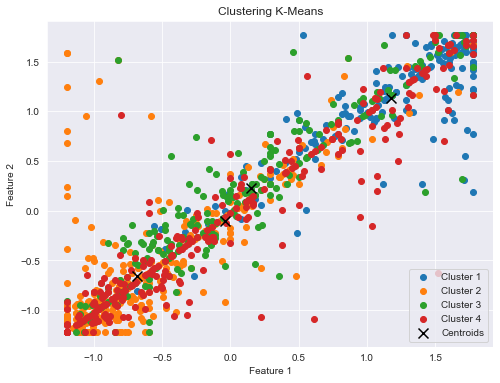

In [34]:
loading2 = scale(loading, with_mean = True, with_std = True)
# Normaliser les données
loading_normalized = scale(loading, with_mean=True, with_std=True)

# Définir le nombre de clusters
k = 4


# Créer une instance du modèle KMeans
kmeans = KMeans(n_clusters=k)

# Ajuster le modèle aux données
kmeans.fit(loading_normalized)

# Obtenir les étiquettes des clusters pour chaque point
labels = kmeans.labels_

# Obtenir les centres des clusters
centers = kmeans.cluster_centers_

# Afficher les données clusterisées sur un graphe
plt.figure(figsize=(8, 6))

# Afficher les points de données avec différentes couleurs pour chaque cluster
for i in range(k):
    plt.scatter(loading_normalized[labels == i, 0], loading_normalized[labels == i, 1], label=f'Cluster {i+1}')

# Afficher les centres des clusters
plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=100, label='Centroids')

plt.title('Clustering K-Means')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\danhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\danhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\danhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\danhe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

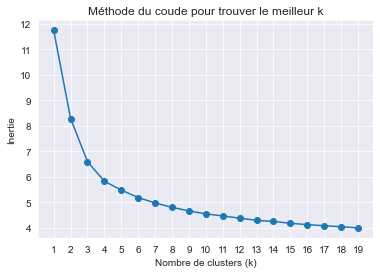

In [32]:
k_values = range(1, 20)

# Stocker les valeurs d'inertie pour chaque valeur de k
inertias = []

# Calculer l'inertie pour chaque valeur de k
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(loading_normalized)
    inertias.append(kmeans.inertia_)
    
# Convertir les valeurs d'inertie en pourcentage
total_variance = np.sum(inertias)
inertias_percentage = [(inertia / total_variance) * 100 for inertia in inertias]

# Tracer le graphique de l'inertie en fonction du nombre de clusters
plt.plot(k_values, inertias_percentage, marker='o')
plt.title('Méthode du coude pour trouver le meilleur k')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.xticks(k_values)
plt.grid(True)
plt.show()

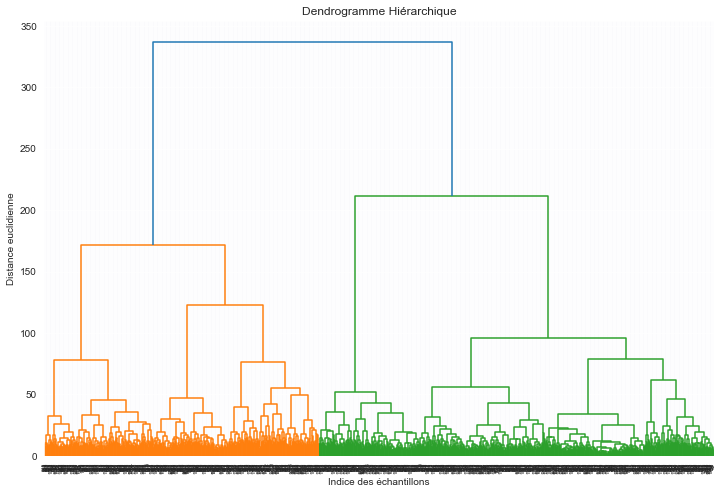

In [51]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import scale
import numpy as np

# Supposons que loading soit votre ensemble de données

# Normaliser les données
loading_normalized = scale(loading, with_mean=True, with_std=True)

# Calculer la matrice de liaison (linkage matrix) en utilisant la méthode de liaison "ward"
# Vous pouvez choisir une autre méthode de liaison si vous le souhaitez (par exemple, "single", "complete", "average")
linkage_matrix = linkage(loading_normalized, method='ward')

# Tracer le dendrogramme
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix)
plt.title('Dendrogramme Hiérarchique')
plt.xlabel('Indice des échantillons')
plt.ylabel('Distance euclidienne')
plt.show()
